<a href="https://colab.research.google.com/github/KaioLopesS/prevendo_doen-as_cardiacas/blob/main/previs%C3%A3o_doen%C3%A7as_card%C3%ADacas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [35]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [36]:
dados_cardio = pd.read_csv("/content/cardio_train.csv", sep =";", index_col = 0)

In [37]:
dados_cardio.info()

<class 'pandas.core.frame.DataFrame'>
Index: 70000 entries, 0 to 99999
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   age          70000 non-null  int64  
 1   gender       70000 non-null  int64  
 2   height       70000 non-null  int64  
 3   weight       70000 non-null  float64
 4   ap_hi        70000 non-null  int64  
 5   ap_lo        70000 non-null  int64  
 6   cholesterol  70000 non-null  int64  
 7   gluc         70000 non-null  int64  
 8   smoke        70000 non-null  int64  
 9   alco         70000 non-null  int64  
 10  active       70000 non-null  int64  
 11  cardio       70000 non-null  int64  
dtypes: float64(1), int64(11)
memory usage: 6.9 MB


In [38]:
dados_cardio.head()

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
id,,,,,,,,,,,,
0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,17474,1,156,56.0,100,60,1,1,0,0,0,0


# **Visualização de dados**

In [39]:
from plotly.subplots import make_subplots
import plotly.graph_objects as go
import plotly.express as px

In [40]:
fig = make_subplots(rows=4, cols=1)

fig.add_trace(go.Box(x=dados_cardio["age"]/365 , name = "Idade"), row = 1, col=1)
fig.add_trace(go.Box(x=dados_cardio["weight"] , name = "Massa"), row = 2, col=1)
fig.add_trace(go.Box(x=dados_cardio["ap_hi"] , name = "psi"), row = 3, col=1)
fig.add_trace(go.Box(x=dados_cardio["ap_lo"] , name = "pso"), row = 4, col=1)
fig.update_layout(height=1000, width=800)
fig.show()


In [41]:
fig2 = make_subplots(rows=6, cols=1)
fig2.add_trace(go.Bar(y=dados_cardio["gender"].value_counts() , x =["Feminino", "Masculino"], name = "gênero"), row = 1, col=1)
fig2.add_trace(go.Bar(y=dados_cardio["cholesterol"].value_counts() ,  name = "colesterol"), row = 2, col=1)
fig2.add_trace(go.Bar(y=dados_cardio["gluc"].value_counts() ,  name = "glicose"), row = 3, col=1)
fig2.add_trace(go.Bar(y=dados_cardio["smoke"].value_counts() , x =["Não Fumante", "fumante"], name = "fumante"), row = 4, col=1)
fig2.add_trace(go.Bar(y=dados_cardio["active"].value_counts() , x =["Não alcoólatra", "alcoólatra"], name = "ativo"), row = 5, col=1)
fig2.add_trace(go.Bar(y=dados_cardio["alco"].value_counts() , x =["Não Ativo", "Ativo"], name = "átivo"), row = 6, col=1)
fig2.update_layout(height = 1000, width = 800)
fig2.show()

<Axes: >

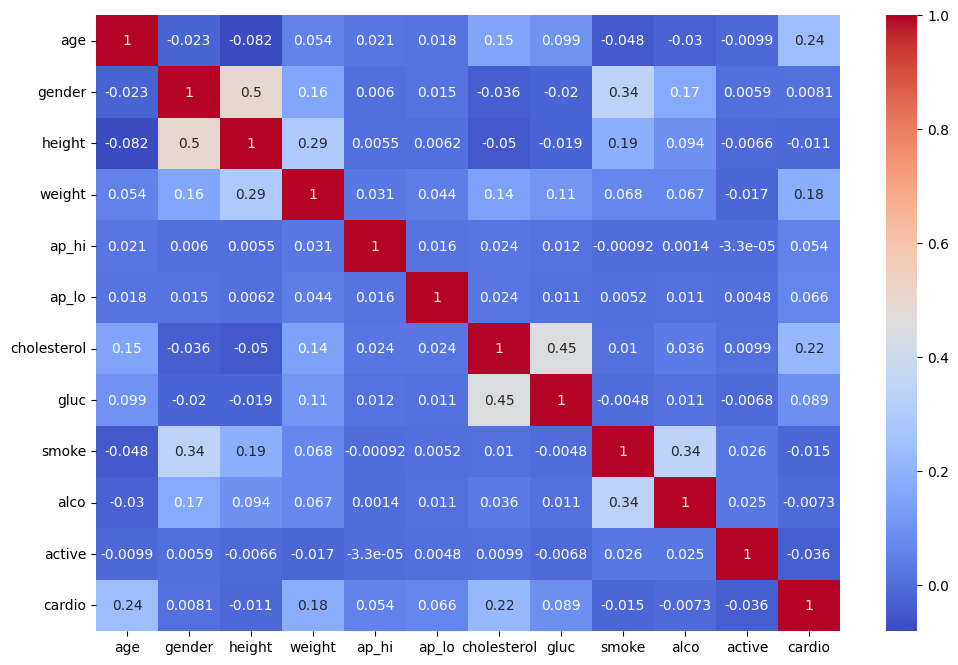

In [42]:
fig, ax = plt.subplots(figsize=(12, 8))
sns.heatmap(dados_cardio.corr(), annot=True, cmap='coolwarm', ax=ax)


# **Treinamento**

In [44]:
x = dados_cardio.drop("cardio", axis = 1)
y = dados_cardio["cardio"]

In [46]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y, random_state = 2562, test_size = 0.3)

In [47]:
from sklearn.ensemble import RandomForestClassifier
modelo_rfc = RandomForestClassifier(n_estimators=40, max_depth=10)
modelo_rfc.fit(x_train, y_train)

RandomForestClassifier(max_depth=10, n_estimators=40)

In [58]:
previsoes = modelo_rfc.predict(x_test)

# **Avaliação**

In [59]:
from sklearn.metrics import classification_report
print(classification_report(y_test, previsoes))

              precision    recall  f1-score   support

           0       0.71      0.79      0.75     10454
           1       0.76      0.68      0.72     10546

    accuracy                           0.73     21000
   macro avg       0.73      0.73      0.73     21000
weighted avg       0.73      0.73      0.73     21000



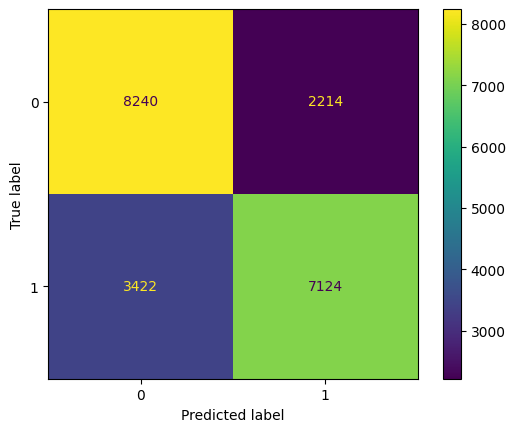

In [64]:
from sklearn.metrics import ConfusionMatrixDisplay
matriz = ConfusionMatrixDisplay.from_estimator(modelo_rfc,x_test, y_test)